<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/pc_on_fundamental_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [74]:
import numpy as np
df=pd.read_csv('/content/nifty50f.csv')

In [75]:
df.head(2)

,Name,CMP,ROE %,P/E,CMP / Sales,Debt / Eq,Earnings Yield %,Mar Cap Rs.Cr.,CMP / BV,ROCE %,OPM %,ROE 5Yr %,Current ratio,Inven TO,OP 12M Rs.Cr.,Sales Rs.Cr.,Sales growth %
0,Reliance Industr,2987.25,8.94,28.92,2.30,0.42,5.47,2021079.46,2.69,9.14,18.02,8.94,1.16,4.95,158073.0,877365.0,0.57
1,TCS,4052.10,46.92,32.16,6.14,0.08,4.27,1466085.24,14.56,58.67,26.34,40.61,2.71,1.54,62906.0,238818.0,10.11


In [76]:
# Set the index to the 'Name' column
df = df.set_index('Name')

In [77]:
df.head(2)

,CMP,ROE %,P/E,CMP / Sales,Debt / Eq,Earnings Yield %,Mar Cap Rs.Cr.,CMP / BV,ROCE %,OPM %,ROE 5Yr %,Current ratio,Inven TO,OP 12M Rs.Cr.,Sales Rs.Cr.,Sales growth %
Name,,,,,,,,,,,,,,,,
Reliance Industr,2987.25,8.94,28.92,2.30,0.42,5.47,2021079.46,2.69,9.14,18.02,8.94,1.16,4.95,158073.0,877365.0,0.57
TCS,4052.10,46.92,32.16,6.14,0.08,4.27,1466085.24,14.56,58.67,26.34,40.61,2.71,1.54,62906.0,238818.0,10.11


In [78]:
# Select relevant fundamental data columns
features = df.columns


In [109]:
features.tolist()

['CMP',
 'ROE\xa0%',
 'P/E',
 'CMP / Sales',
 'Debt / Eq',
 'Earnings Yield\xa0%',
 'Mar Cap\xa0Rs.Cr.',
 'CMP / BV',
 'ROCE\xa0%',
 'OPM\xa0%',
 'ROE 5Yr\xa0%',
 'Current ratio',
 'Inven TO',
 'OP 12M\xa0Rs.Cr.',
 'Sales\xa0Rs.Cr.',
 'Sales growth\xa0%']

In [79]:
X=df[features]

In [80]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0.01))

In [81]:
# Create PCA object (reduce dimensions to 2 for easier visualization)
pca = PCA(n_components=2)

# Fit PCA to the standardized data
principal_components = pca.fit_transform(X_scaled)

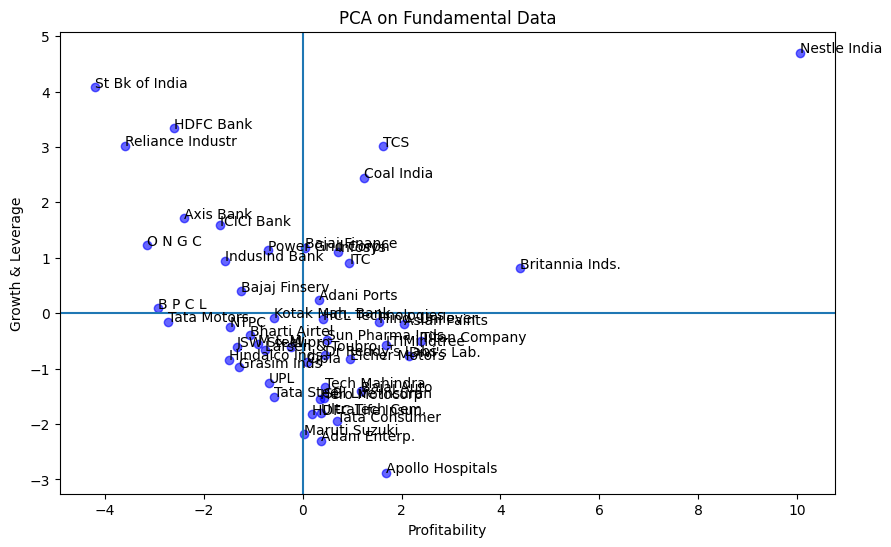

In [106]:
# Create DataFrame for easy visualization
principal_df = pd.DataFrame(data=principal_components,
                            columns=['PC1', 'PC2'],
                            index=df.index)

# Plot the results (Customize plot appearance as needed)
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', alpha = 0.6)
plt.xlabel('Profitability')
plt.ylabel('Growth & Leverage')
plt.title('PCA on Fundamental Data')
plt.axhline(y=0)
plt.axvline(x=0)
# Labels for companies
for i, txt in enumerate(df.index):
    plt.annotate(txt, (principal_df['PC1'].iloc[i], principal_df['PC2'].iloc[i]))

plt.show()


In [83]:
# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
[[-3.59473654  3.01945358]
 [ 1.62398725  3.0123554 ]
 [-2.60467319  3.33668614]
 [-1.68349062  1.58303141]
 [ 0.70542361  1.10962023]
 [-4.20342415  4.07324359]
 [-1.07272134 -0.39864657]
 [ 1.54899855 -0.15894968]
 [ 0.94133699  0.90152751]
 [-0.76914028 -0.67294862]
 [ 0.40446147 -0.11008647]
 [ 0.04305692  1.18328793]
 [ 0.49326437 -0.47966902]
 [ 0.36754163 -2.30250524]
 [ 0.03290454 -2.18755545]
 [-2.73304642 -0.15086258]
 [-0.58849986 -0.08031544]
 [-3.15961512  1.22715798]
 [-2.4101241   1.71096507]
 [ 2.38333353 -0.50308961]
 [-1.47115588 -0.24178536]
 [ 0.37216386 -1.80493335]
 [ 2.05390686 -0.20178799]
 [ 0.33927585  0.24668391]
 [-0.23718256 -0.6013634 ]
 [ 1.23420336  2.4474643 ]
 [-0.70584896  1.13478172]
 [-1.25066458  0.39530498]
 [10.05343679  4.69970699]
 [-0.90902546 -0.5570388 ]
 [ 1.17507152 -1.40328306]
 [-1.32670094 -0.60348459]
 [-0.57731589 -1.50516335]
 [ 1.68010038 -0.58117057]
 [ 0.43316921 -1.5267848 ]
 [-1.29714804 -0.9773808 ]
 [-2.9

In [84]:
df.columns

Index(['CMP', 'ROE %', 'P/E', 'CMP / Sales', 'Debt / Eq', 'Earnings Yield %',
       'Mar Cap Rs.Cr.', 'CMP / BV', 'ROCE %', 'OPM %', 'ROE 5Yr %',
       'Current ratio', 'Inven TO', 'OP 12M Rs.Cr.', 'Sales Rs.Cr.',
       'Sales growth %'],
      dtype='object')

In [85]:
df.index


Index(['Reliance Industr', 'TCS', 'HDFC Bank', 'ICICI Bank', 'Infosys',
       'St Bk of India', 'Bharti Airtel', 'Hind. Unilever', 'ITC',
       'Larsen & Toubro', 'HCL Technologies', 'Bajaj Finance',
       'Sun Pharma.Inds.', 'Adani Enterp.', 'Maruti Suzuki', 'Tata Motors',
       'Kotak Mah. Bank', 'O N G C', 'Axis Bank', 'Titan Company', 'NTPC',
       'UltraTech Cem.', 'Asian Paints', 'Adani Ports', 'Wipro', 'Coal India',
       'Power Grid Corpn', 'Bajaj Finserv', 'Nestle India', 'M & M',
       'Bajaj Auto', 'JSW Steel', 'Tata Steel', 'LTIMindtree',
       'SBI Life Insuran', 'Grasim Inds', 'B P C L', 'Tech Mahindra',
       'HDFC Life Insur.', 'Britannia Inds.', 'Cipla', 'Hindalco Inds.',
       'IndusInd Bank', 'Tata Consumer', 'Eicher Motors', 'Dr Reddy's Labs',
       'Apollo Hospitals', 'Divi's Lab.', 'Hero Motocorp', 'UPL'],
      dtype='object', name='Name')

In [86]:
from sklearn.decomposition import PCA

# Assuming you already have your PCA model created and fitted as 'pca'
loadings = pca.components_
print('principal components loadings')
print(loadings)


principal components loadings
[[ 0.1415325   0.36179835  0.24155382  0.31041596 -0.21778801 -0.22222502
  -0.11582985  0.38616031  0.37527501 -0.07637471  0.36570662  0.03062723
   0.02602829 -0.27796357 -0.26942572 -0.05600938]
 [-0.17666648  0.32474284 -0.2309519   0.11214806  0.29235188  0.14832562
   0.35217286  0.18386699  0.25798917  0.29676643  0.29428251  0.08345645
  -0.22000966  0.40462896  0.23928005  0.12055076]]


In [87]:
import pandas as pd

pc_rankings = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index=df.index)
pc_rankings['PC1 Rank'] = pc_rankings['PC1'].rank(ascending=False)
pc_rankings['PC2 Rank'] = pc_rankings['PC2'].rank(ascending=False)
print(pc_rankings)


                        PC1       PC2  PC1 Rank  PC2 Rank
Name                                                     
Reliance Industr  -3.594737  3.019454      49.0       4.0
TCS                1.623987  3.012355       8.0       5.0
HDFC Bank         -2.604673  3.336686      45.0       3.0
ICICI Bank        -1.683491  1.583031      43.0       8.0
Infosys            0.705424  1.109620      14.0      12.0
St Bk of India    -4.203424  4.073244      50.0       2.0
Bharti Airtel     -1.072721 -0.398647      36.0      25.0
Hind. Unilever     1.548999 -0.158950       9.0      22.0
ITC                0.941337  0.901528      13.0      14.0
Larsen & Toubro   -0.769140 -0.672949      34.0      32.0
HCL Technologies   0.404461 -0.110086      20.0      20.0
Bajaj Finance      0.043057  1.183288      27.0      10.0
Sun Pharma.Inds.   0.493264 -0.479669      16.0      26.0
Adani Enterp.      0.367542 -2.302505      22.0      49.0
Maruti Suzuki      0.032905 -2.187555      28.0      48.0
Tata Motors   

In [88]:
# 1. Sort by PC1 in descending order and select top 5 performers
top_by_pc1 = pc_rankings.nlargest(10, 'PC1')

# 2. Sort by PC2 in descending order
top_by_pc1 = top_by_pc1.sort_values(by='PC2', ascending=False)

# 3. Final list: companies in the top 5 by PC1 that also remain near the top by PC2
final_list = top_by_pc1.head(5)  # Assuming "near the top" means the top 1 company by PC2

# Print the final list
print(final_list)

                       PC1       PC2  PC1 Rank  PC2 Rank
Name                                                    
Nestle India     10.053437  4.699707       1.0       1.0
TCS               1.623987  3.012355       8.0       5.0
Coal India        1.234203  2.447464      10.0       6.0
Britannia Inds.   4.403260  0.807832       2.0      15.0
Hind. Unilever    1.548999 -0.158950       9.0      22.0


In [89]:
top_by_pc1

,PC1,PC2,PC1 Rank,PC2 Rank
Name,,,,
Nestle India,10.053437,4.699707,1.0,1.0
TCS,1.623987,3.012355,8.0,5.0
Coal India,1.234203,2.447464,10.0,6.0
Britannia Inds.,4.403260,0.807832,2.0,15.0
Hind. Unilever,1.548999,-0.158950,9.0,22.0
Asian Paints,2.053907,-0.201788,5.0,23.0
Titan Company,2.383334,-0.503090,3.0,27.0
LTIMindtree,1.680100,-0.581171,7.0,29.0
Divi's Lab.,2.155748,-0.774491,4.0,34.0


In [90]:
# 1. Sort by PC2 in descending order and select top 5 performers
top_by_pc2 = pc_rankings.nlargest(5, 'PC2')

# 2. Sort by PC1 in descending order
top_by_pc2 = top_by_pc2.sort_values(by='PC1', ascending=False)

# 3. Final list: companies in the top 5 by PC2 that also remain near the top by PC1
final_list = top_by_pc2.head(5)  # Assuming "near the top" means the top 1 company by PC1
# Print the final list
print(final_list)

                        PC1       PC2  PC1 Rank  PC2 Rank
Name                                                     
Nestle India      10.053437  4.699707       1.0       1.0
TCS                1.623987  3.012355       8.0       5.0
HDFC Bank         -2.604673  3.336686      45.0       3.0
Reliance Industr  -3.594737  3.019454      49.0       4.0
St Bk of India    -4.203424  4.073244      50.0       2.0


In [100]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'data'
correlation_PC1_ROE = principal_df['PC1'].corr(df['ROE\xa0%'])
correlation_PC1_PE = principal_df['PC1'].corr(df['P/E'])
correlation_PC1_DE = principal_df['PC1'].corr(df['Debt / Eq'])#,
correlation_PC1_EY = principal_df['PC1'].corr(df['Earnings Yield\xa0%'])
correlation_PC1_OPM = principal_df['PC1'].corr(df['OPM\xa0%'])#'OPM\xa0%'
correlation_PC1_Sales_Growth = principal_df['PC1'].corr(df['Sales growth\xa0%'])#'OPM\xa0%'
#'Sales growth\xa0%'
# ... and so on for other features

In [91]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'data'
correlation_PC2_ROE = principal_df['PC2'].corr(df['ROE\xa0%'])
correlation_PC2_PE = principal_df['PC2'].corr(df['P/E'])
correlation_PC2_DE = principal_df['PC2'].corr(df['Debt / Eq'])#,
correlation_PC2_EY = principal_df['PC2'].corr(df['Earnings Yield\xa0%'])
correlation_PC2_OPM = principal_df['PC2'].corr(df['OPM\xa0%'])#'OPM\xa0%'
correlation_PC2_Sales_Growth = principal_df['PC2'].corr(df['Sales growth\xa0%'])#'OPM\xa0%'
#'Sales growth\xa0%'
# ... and so on for other features


In [92]:
print(correlation_PC2_ROE ,correlation_PC2_PE ,correlation_PC2_DE ,correlation_PC2_EY,correlation_PC2_OPM,correlation_PC2_Sales_Growth)

0.5344631814667752 -0.411192984054954 0.48115400062044045 0.24411495842653413 0.4884194885265762 0.19840297269101503


In [101]:
print(correlation_PC1_ROE ,correlation_PC1_PE ,correlation_PC1_DE ,correlation_PC1_EY,correlation_PC1_OPM,correlation_PC1_Sales_Growth)

0.7945341062715362 0.5323826368963107 -0.47827748584612856 -0.4880214612593788 -0.16772412288860633 -0.12300046375854946


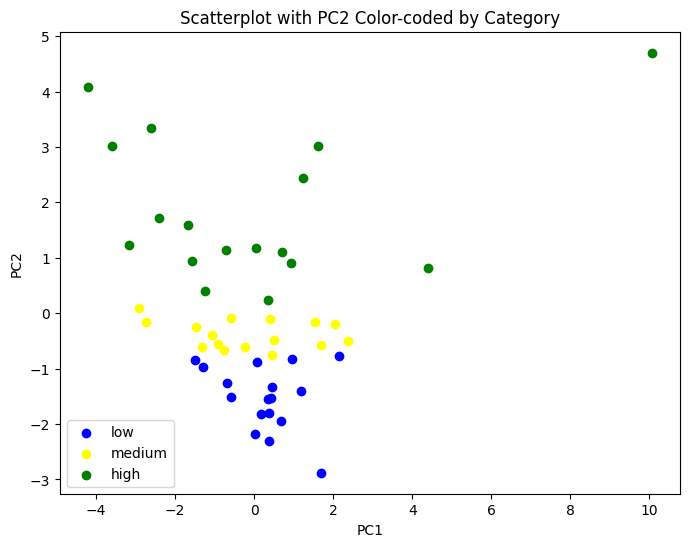

In [102]:
# Categorize PC2 scores as high, medium, or low
pc2_thresholds = {
    'low': np.percentile(principal_df['PC2'], 33.3),  # 33.3% percentile
    'medium': np.percentile(principal_df['PC2'], 66.6),  # 66.6% percentile
    'high': np.inf  # Anything above the medium threshold is high
}

def categorize_pc2(pc2_value):
    for category, threshold in pc2_thresholds.items():
        if pc2_value <= threshold:
            return category

# Add category column to DataFrame
principal_df['PC2 Category'] = principal_df['PC2'].apply(categorize_pc2)

# Color-coding dictionary
color_dict = {
    'low': 'blue',
    'medium': 'yellow',
    'high': 'green'
}

# Plot scatterplot with color-coded points
plt.figure(figsize=(8, 6))
for category, color in color_dict.items():
    subset = principal_df[principal_df['PC2 Category'] == category]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=category)

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot with PC2 Color-coded by Category')

# Show plot
plt.show()


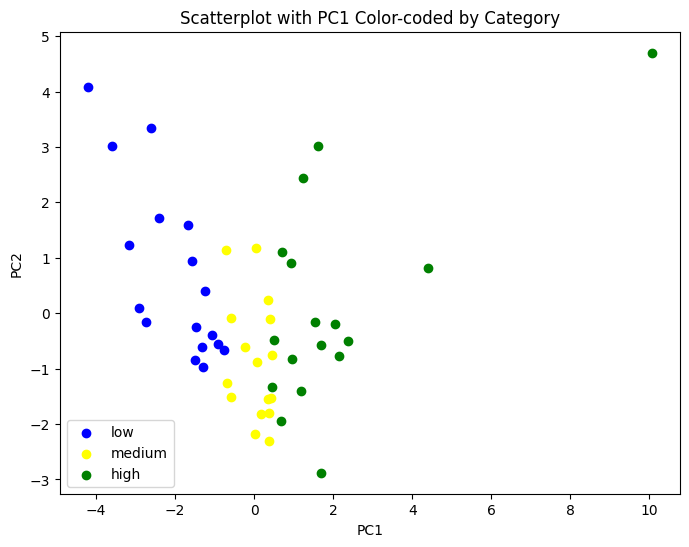

In [103]:
# Categorize PC1 scores as high, medium, or low
pc1_thresholds = {
    'low': np.percentile(principal_df['PC1'], 33.3),  # 33.3% percentile
    'medium': np.percentile(principal_df['PC1'], 66.6),  # 66.6% percentile
    'high': np.inf  # Anything above the medium threshold is high
}

def categorize_pc1(pc1_value):
    for category, threshold in pc1_thresholds.items():
        if pc1_value <= threshold:
            return category

# Add category column to DataFrame
principal_df['PC1 Category'] = principal_df['PC1'].apply(categorize_pc1)

# Color-coding dictionary
color_dict = {
    'low': 'blue',
    'medium': 'yellow',
    'high': 'green'
}

# Plot scatterplot with color-coded points
plt.figure(figsize=(8, 6))
for category, color in color_dict.items():
    subset = principal_df[principal_df['PC1 Category'] == category]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=category)

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot with PC1 Color-coded by Category')

# Show plot
plt.show()


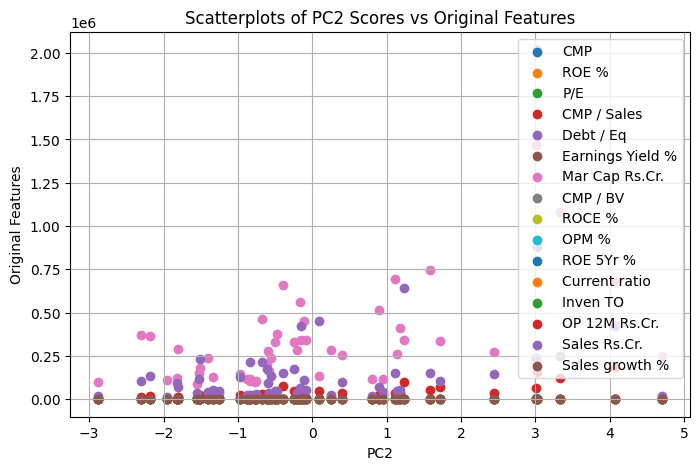

In [104]:
# Concatenate PC2 scores with original data
finalDf = pd.concat([principal_df, df], axis=1)

# Plot scatterplots
plt.figure(figsize=(8,5))
for feature in features:
    plt.scatter(finalDf['PC2'], finalDf[feature], label=feature)

# Add labels and title
plt.xlabel('PC2')
plt.ylabel('Original Features')
plt.title('Scatterplots of PC2 Scores vs Original Features')
plt.legend()
plt.grid(True)

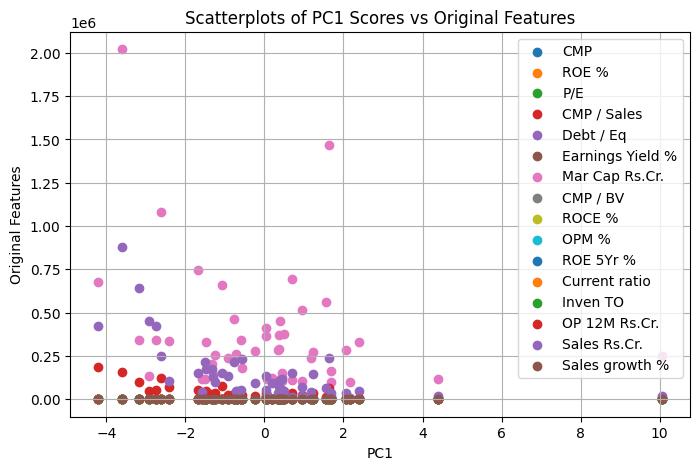

In [105]:
# Plot scatterplots
plt.figure(figsize=(8,5))
for feature in features:
    plt.scatter(finalDf['PC1'], finalDf[feature], label=feature)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('Original Features')
plt.title('Scatterplots of PC1 Scores vs Original Features')
plt.legend()
plt.grid(True)

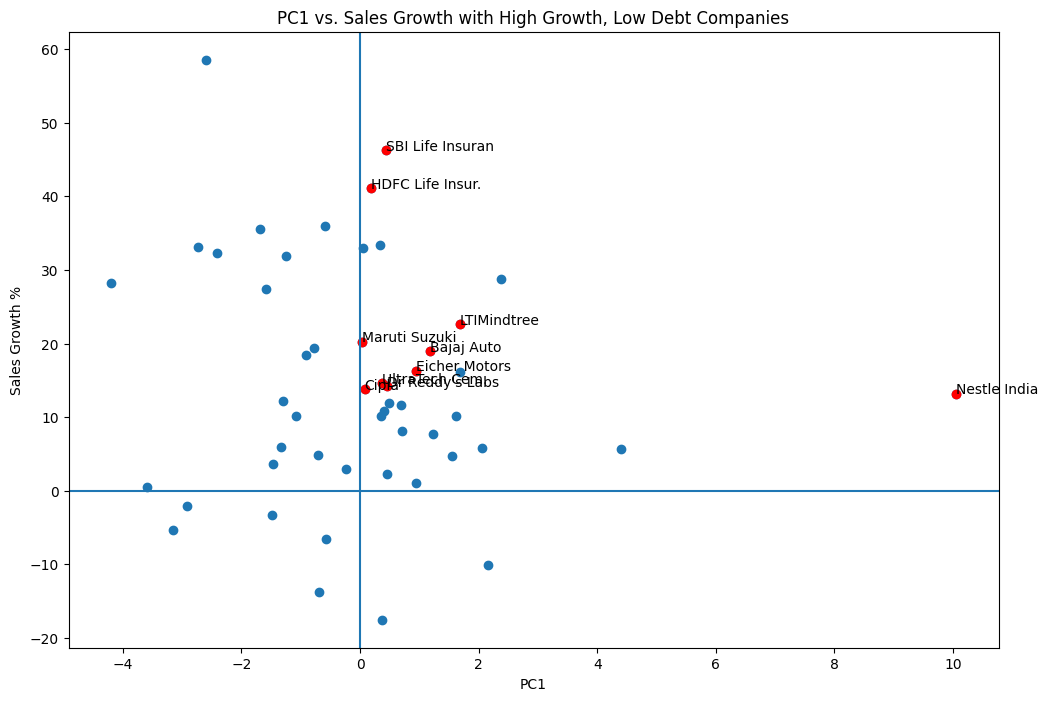

In [118]:
# Define your thresholds for high growth and low debt
high_growth_threshold = 12  # Example: At least 20% sales growth
low_debt_threshold = 0.5   # Example: Debt/Equity ratio below 0.5

# Filter the data
filtered_data = finalDf[(finalDf[''] >= high_growth_threshold) &
                     (finalDf['Debt / Eq'] <= low_debt_threshold)]
plt.figure(figsize=(12, 8)) # Adjust figure size if needed
plt.scatter(finalDf['PC1'], finalDf['Sales growth\xa0%'])

# Highlight the filtered companies
plt.scatter(filtered_data['PC1'], filtered_data['Sales growth\xa0%'], color='red')

plt.xlabel('PC1')
plt.ylabel('Sales Growth %')
plt.axhline(y=0)
plt.axvline(x=0)
for i, txt in enumerate(filtered_data.index):
    plt.annotate(txt, (filtered_data['PC1'].iloc[i], filtered_data['Sales growth\xa0%'].iloc[i]))
plt.title('PC1 vs. Sales Growth with High Growth, Low Debt Companies')
plt.show()


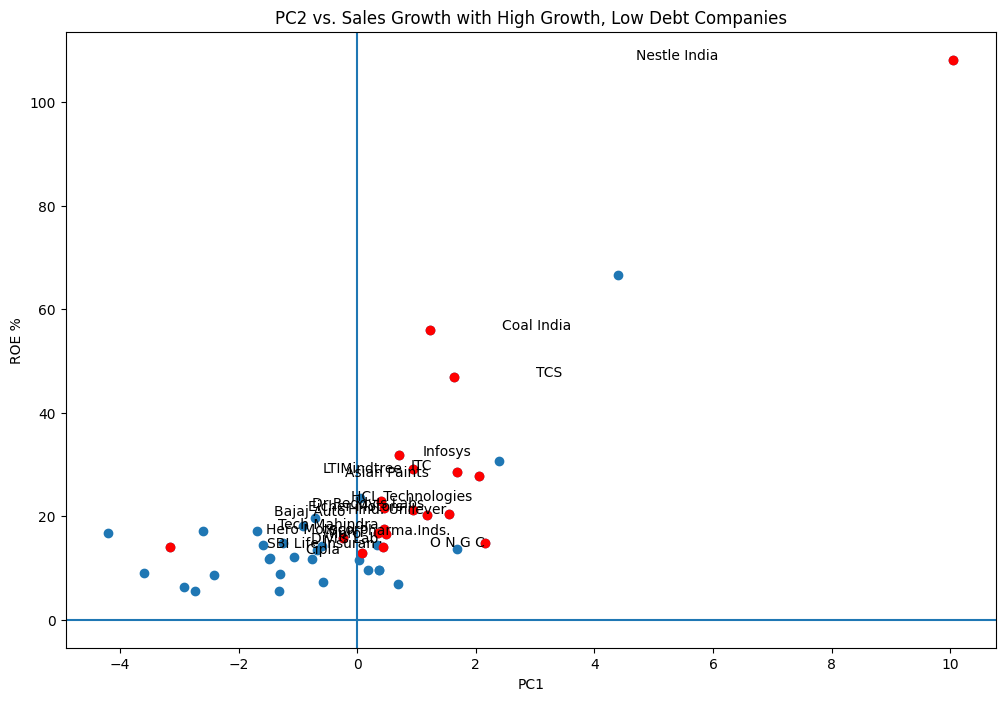

In [122]:
# Define your thresholds for high growth and low debt
high_growth_threshold = 12  # Example: At least 20% sales growth
low_debt_threshold = 0.5   # Example: Debt/Equity ratio below 0.5

# Filter the data
filtered_data = finalDf[(finalDf['ROE\xa0%'] >= high_growth_threshold) &
                     (finalDf['Debt / Eq'] <= low_debt_threshold)]
plt.figure(figsize=(12, 8)) # Adjust figure size if needed
plt.scatter(finalDf['PC1'], finalDf['ROE\xa0%'])

# Highlight the filtered companies
plt.scatter(filtered_data['PC1'], filtered_data['ROE\xa0%'], color='red')

plt.xlabel('PC1')
plt.ylabel('ROE %')
plt.axhline(y=0)
plt.axvline(x=0)
for i, txt in enumerate(filtered_data.index):
    plt.annotate(txt, (filtered_data['PC2'].iloc[i], filtered_data['ROE\xa0%'].iloc[i]))
plt.title('PC2 vs. Sales Growth with High Growth, Low Debt Companies')
plt.show()


Absolutely! Let's break down the correlations and discuss how to interpret this PCA for stock analysis:

Correlation Analysis

PC1: Stronger Emphasis on Profitability

High Positive Correlation: Strongest correlation with ROE (79%). This suggests that PC1 heavily emphasizes profitability, with companies demonstrating higher Return on Equity scoring higher on PC1.
Moderate Correlations: Moderate correlations with P/E (53%), Debt/Equity (-47%), and Earnings Yield (-48%) paint a mixed picture. PC1 likely still considers valuation and financial health aspects but less directly than profitability.
Weak Negative Correlations: Very weak correlations with OPM (-18%) and Sales Growth (-13%) suggest these might be minor factors influencing PC1.
PC2: Growth, Leverage, & Mixed Profitability Signals

Moderate Correlations: PC2 shows moderate correlations with ROE (54%), Debt/Equity (48%), and OPM (48%). This indicates that growth-focused companies (with higher debt and potentially sales growth) may have a complex relationship with profitability metrics.
Weaker Correlations: Weaker correlations with P/E (-41%), EY (24%), and Sales Growth (20%) suggest that while PC2 considers valuation and growth potential, these might not be the primary drivers.
PCA for Stock Analysis: Key Takeaways

Distinct Dimensions: PC1 and PC2 seem to represent distinct dimensions in your stock dataset:

PC1: Profitability Focus Companies with strong profitability (primarily ROE) likely score high on PC1. It might also signal more conservative financial strategies.
PC2: Growth & Leverage Focus Companies taking on more debt and demonstrating sales growth tend to score high on PC2. Their relationship with profitability can be mixed.
Not All Metrics Are Equal: Some financial metrics have a stronger influence on the principal components. In this case, ROE drives PC1, while Debt/Equity and Sales Growth are more influential in PC2.

Correlation vs. Causation: Remember, these correlations show associations but don't imply causation.

How to Use This in Stock Analysis

Portfolio Construction:
Understand your investment goals. If you're prioritizing stability and dividends, look for companies with high PC1 scores. If you're comfortable with higher risk for potential high growth, focus on companies with high PC2 scores.
Quick Comparisons: The PC scores can offer a rapid way to compare stocks within a similar industry, visualizing which tend towards profitability or growth.
Combining with Other Analysis: PCA is one tool. Always combine this information with fundamental analysis, industry knowledge, and your overall investment strategy.
Important Considerations

Dynamic Data: Stock data is time-dependent. Update your PCA if you analyze a different period or if the market context changes significantly.
Sector-Specific PCA: Applying PCA on companies within a specific sector can provide more focused insights relevant to that sector's dynamics.